In [1]:
from dc_b import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
sb.set()
sb.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 144
plt.rcParams['font.family'] = "STZhongsong"
plt.rcParams['axes.unicode_minus'] = False

# 使用惠斯通电桥测量铜电阻

**请将数据放入字典对象`b_data`中**

参数解释:
1. `Us` :平衡电压
2. `R1` : R1阻值
3. `R2` : R2阻值
4. `_R3_l` : R3测量值数列
5. `_t_l` : 温度T测量值数列,温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`


数据	温度	    R_3测量值	    R_x计算值	    
---------------------------------------------------------------------------------------------------------------
#0	28.20	    562.34	    56.23	    
#1	31.20	    568.42	    56.84	    
#2	34.20	    574.69	    57.47	    
#3	37.20	    581.00	    58.10	    
#4	40.20	    587.38	    58.74	    
#5	43.20	    593.79	    59.38	    
#6	46.20	    599.85	    59.99	    
#7	49.20	    606.17	    60.62	    
#8	52.20	    612.59	    61.26	    
#9	55.20	    619.01	    61.90	    
---------------------------------------------------------------------------------------------------------------
R = 0.2100t + 50.295
R = 50.295 * (1 + 0.004176t)
不确定度 U_alpha = 2.4%


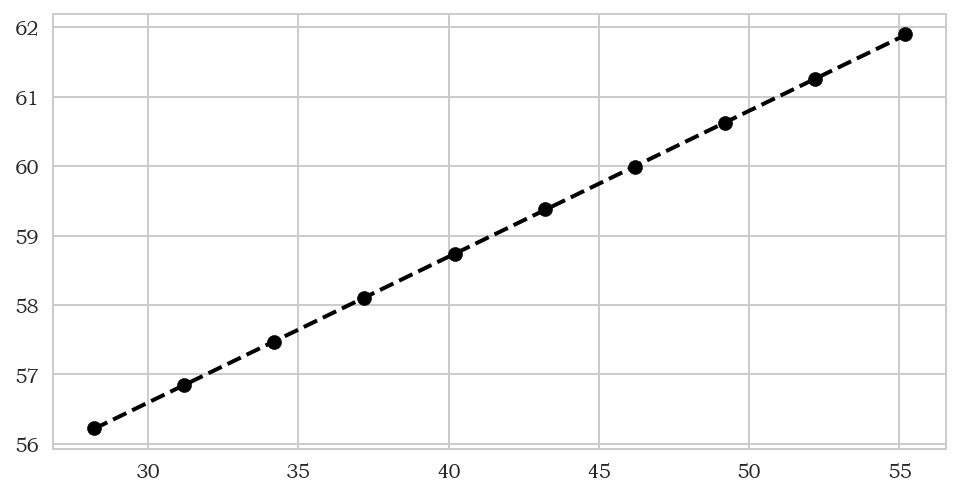

In [3]:
b_data = {
    'Us'    : 5, 
    'R1'    : 100,
    'R2'    : 1000,
    '_R3_l' : il("562.34+568.42+574.69+581.00+587.38+593.79+599.85+606.17+612.59+619.01"), 
    '_t_l'  : make3(28.2)
}
b_bridge(**b_data)

# 使用卧式电桥测量铜电阻

**请将数据放入字典对象`l_data`中**

参数解释:
1. `Us` :平衡电压
2. `R2` : R2阻值
3. `R3` : R3阻值
4. `R1_0` : R1初始测量值
5. `_t_l` : 温度T测量值数列,温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`
6. `_U_l` : 电压测量值数列


数据	温度	    电压测量值	    delta_R_x	    R_x计算值	    
---------------------------------------------------------------------------------------------------------------
#0	31.20	    0.00	    0.00	    56.83	    
#1	34.20	    3.50	    0.61	    57.44	    
#2	37.20	    6.60	    1.15	    57.98	    
#3	40.20	    10.10	    1.77	    58.60	    
#4	43.20	    13.50	    2.36	    59.19	    
#5	46.20	    16.80	    2.94	    59.77	    
#6	49.20	    20.20	    3.53	    60.36	    
#7	52.20	    23.60	    4.13	    60.96	    
#8	55.20	    26.90	    4.70	    61.53	    
#9	58.20	    30.10	    5.26	    62.09	    
---------------------------------------------------------------------------------------------------------------
R = 0.1954t + 50.740
R = 50.740 * (1 + 0.003851t)
R_0 = 50.740, alpha = 0.003851
不确定度 U_alpha = 10.0%


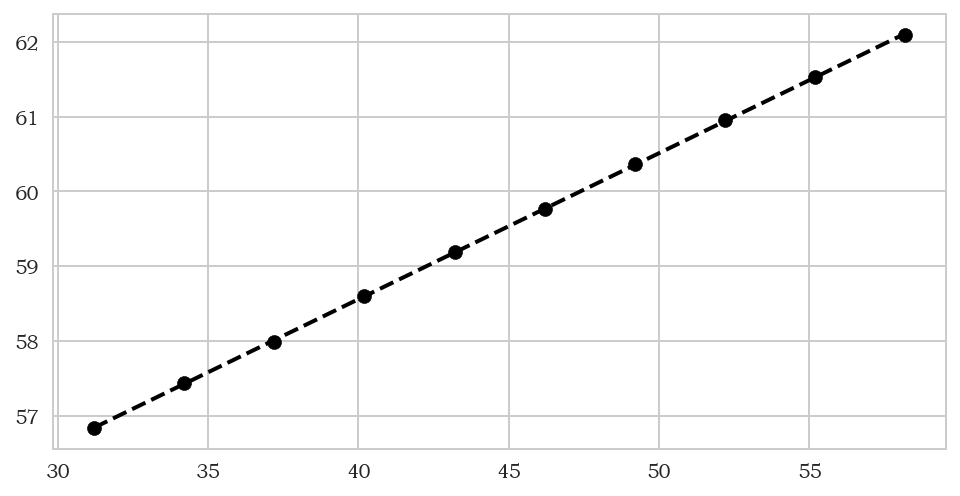

In [4]:
l_data = {
    'Us'   : 1.3,
    'R2'   : 50,
    'R3'   : 50,
    'R1_0' : 56.83,
    '_t_l' : make3(31.2),
    '_U_l' : il("0+3.5+6.6+10.1+13.5+16.8+20.2+23.6+26.9+30.1")
}
l_bridge(**l_data)

# 使用立式电桥测量热敏电阻

**请将数据放入字典对象`l_data`中**

参数解释:
1. `Us` :平衡电压
2. `R1` : R1阻值
3. `R2` : R2阻值
4. `R3_0` : R3初始测量值
5. `_t_l` : 温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`
6. `_U_l` : 电压测量值数列


数据	温度	    电压测量值	    delta_R_x	    R_x计算值	    T(=t+273)	    ln(R_x)	    1/T	    
---------------------------------------------------------------------------------------------------------------
#0	31.40	    0.00	    0.00	    2296.74	    304.40	    7.7392	    0.003285	    
#1	34.40	    -5.00	    -202.29	    2094.45	    307.40	    7.6470	    0.003253	    
#2	37.40	    -11.00	    -404.11	    1892.63	    310.40	    7.5457	    0.003222	    
#3	40.40	    -17.60	    -587.17	    1709.57	    313.40	    7.4440	    0.003191	    
#4	43.40	    -24.90	    -754.09	    1542.65	    316.40	    7.3413	    0.003161	    
#5	46.40	    -32.70	    -901.46	    1395.28	    319.40	    7.2409	    0.003131	    
#6	49.40	    -41.00	    -1031.77	    1264.97	    322.40	    7.1428	    0.003102	    
#7	52.40	    -50.10	    -1150.82	    1145.92	    325.40	    7.0440	    0.003073	    
#8	55.40	    -59.80	    -1256.79	    1039.95	    328.40	    6.9469	    0.003045	    
#9	58.40	    -70.20	    -1352.06	    944.68	    331.40	

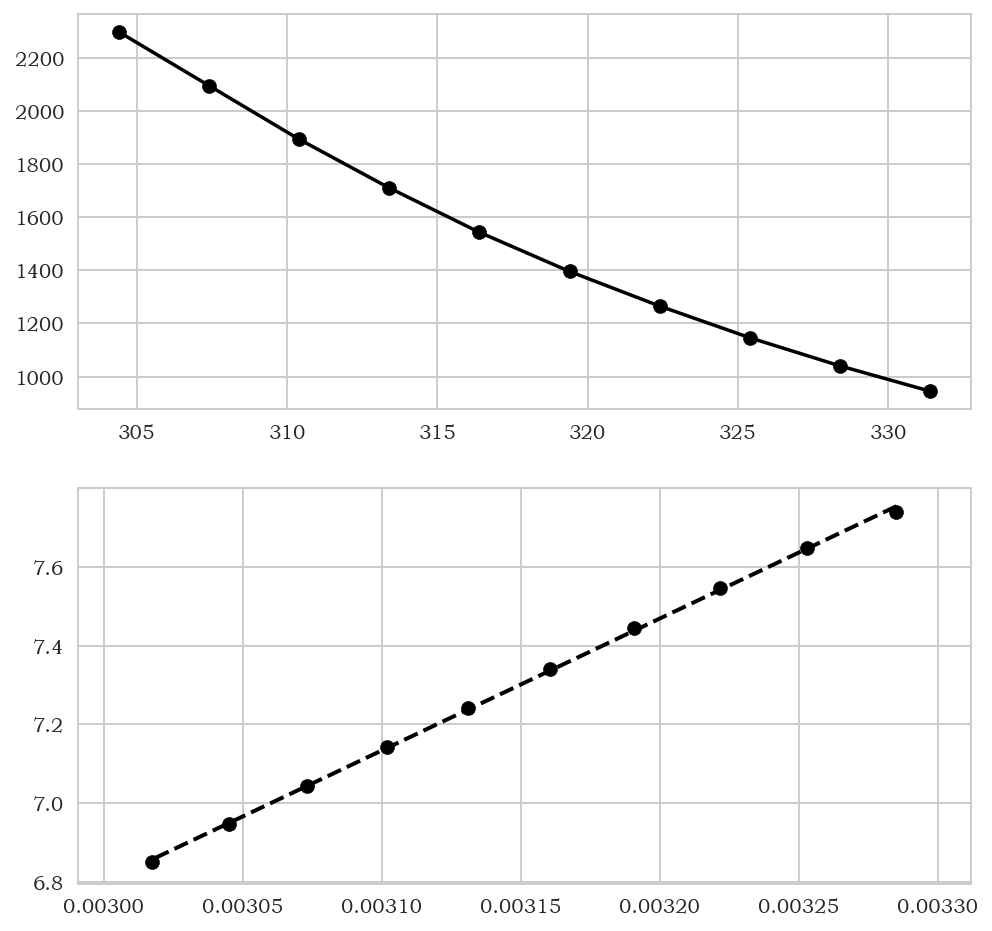

In [5]:
s_data = {
    'Us'   : 1.3, 
    'R1'   : 100, 
    'R2'   : 100, 
    'R3_0' : 2296.74, 
    '_t_l' : make3(31.4), 
    '_U_l' : il("0+-5.0+-11.0+-17.6+-24.9+-32.7+-41.0+-50.1+-59.8+-70.2")
}
s_bridge(**s_data)